In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df =pd.read_csv('winequality - winequality.csv')

In [2]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
X=df.iloc[:,[8,9,11,12]]  #ph,alcohol,quality
print(X[0:5])

print(np.isnan(X))  # will give you true if you have missing values.


Y=df.iloc[:,0].values
#print(Y.head())
Y

   density    pH  alcohol  quality
0   1.0010  3.00      8.8        6
1   0.9940  3.30      9.5        6
2   0.9951  3.26     10.1        6
3   0.9956  3.19      9.9        6
4   0.9956  3.19      9.9        6
      density     pH  alcohol  quality
0       False  False    False    False
1       False  False    False    False
2       False  False    False    False
3       False  False    False    False
4       False  False    False    False
...       ...    ...      ...      ...
6492    False  False    False    False
6493    False  False    False    False
6494    False  False    False    False
6495    False  False    False    False
6496    False  False    False    False

[6497 rows x 4 columns]


array(['white', 'white', 'white', ..., 'red', 'red', 'red'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
# for y
y_labelencoder = LabelEncoder ()
Y = y_labelencoder.fit_transform (Y)
print (Y)


[1 1 1 ... 0 0 0]


In [12]:
from sklearn.impute import SimpleImputer
missingValueImputer = SimpleImputer (missing_values = np.NaN, strategy = 'mean')  
missingValueImputer = missingValueImputer.fit (X)

X = missingValueImputer.transform(X)

In [13]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, Y, test_size = .20, 
                                                     random_state = 0)


In [18]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(n_estimators =10, random_state =0,max_depth =4, criterion ="gini")

model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=10, random_state=0)

In [19]:
prd = model.predict(X_test)
prd

array([1, 0, 1, ..., 1, 1, 1])

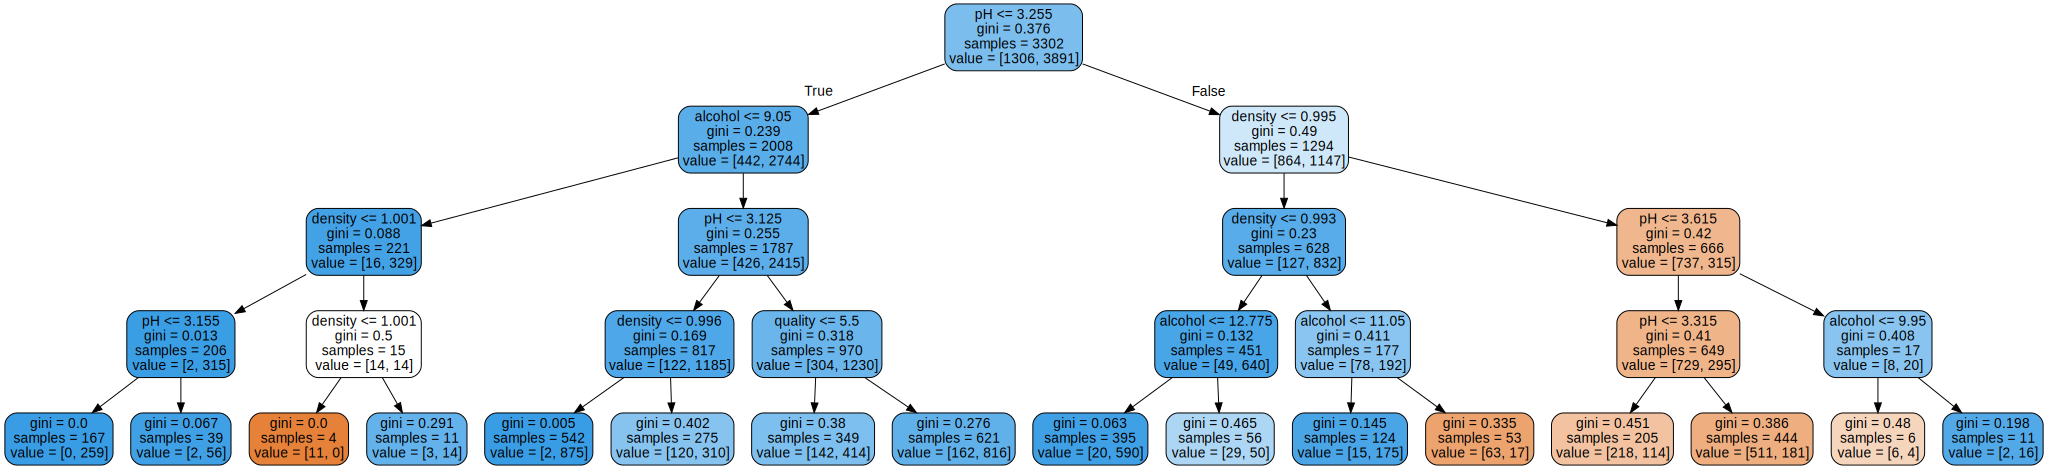

In [20]:
est= model.estimators_[5]
label =["density","pH","alcohol","quality"]

from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

graph =Source(tree.export_graphviz(est,out_file=None,feature_names=label,filled=True,rounded =True))
display(SVG(graph.pipe(format='svg')))